In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import scipy.sparse as sparse
import sklearn.metrics as metrics
import sys as sys
import skimage
import PIL
import sklearn.mixture as mixture
import math

/Users/tyyoo/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
from skimage import data,io

In [3]:
import os
pthname = '/Users/tyyoo/Documents/Harvard University/CS281/FinalProject/CS281 TestDataSet/RECEPTOR/RECEPTOR snr 7 density low/'
fname_list = [pthname+'RECEPTOR snr 7 density low t%03d z0.tif' %n for n in range(100) ]
imgs = {}
for i,fname in enumerate(fname_list):
    imgs[i] = np.array(io.imread(fname),dtype=float)

In [4]:
%%time
from skimage import feature
thres = np.mean(imgs[0])
A = feature.blob_log(imgs[0],threshold=10)

CPU times: user 1.93 s, sys: 170 ms, total: 2.1 s
Wall time: 2.31 s


/Users/tyyoo/anaconda/lib/python2.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warnings.warn("Float image out of standard range; displaying "


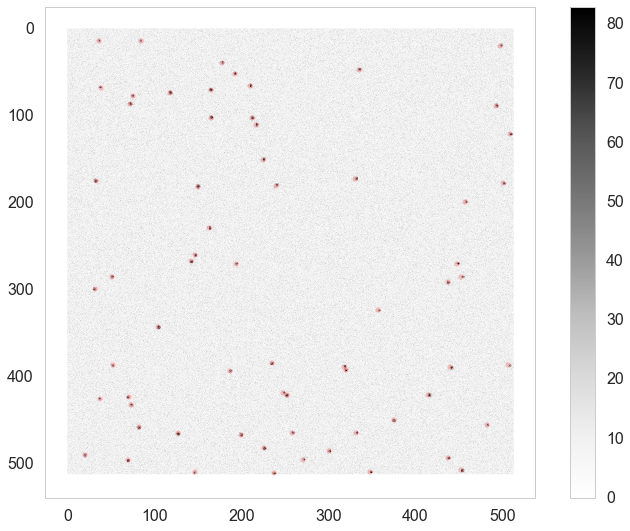

In [5]:
io.imshow(imgs[0],cmap='Greys')
plt.scatter(A[:,1],A[:,0],20,color='r',alpha=0.2)
plt.grid(False)

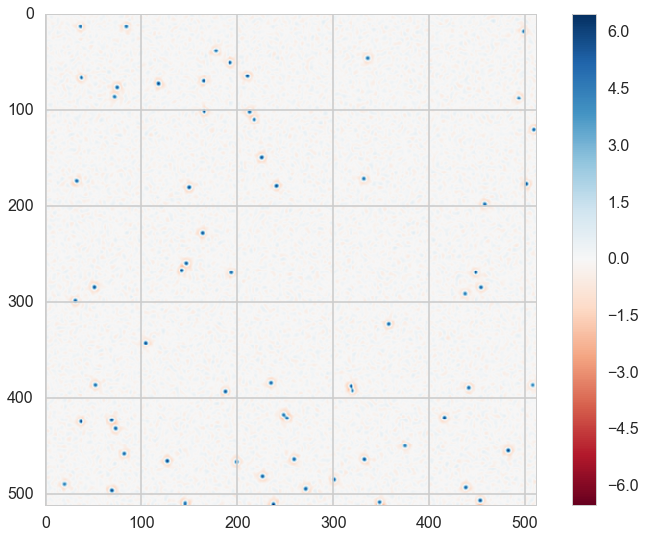

In [6]:
filtered = -sp.ndimage.filters.gaussian_laplace(imgs[0],2)
io.imshow(filtered)


In [7]:
c = 3
thres = (np.mean(filtered)+c)*np.std(filtered)
thres_filtered = filtered-thres
thres_filtered[thres_filtered<0] = 0 
#io.imshow(thres_filtered)
grad_filtered = np.gradient(filtered)
#np.min(np.abs(grad_filtered))

In [8]:
zero_crossings = np.where((np.diff(np.sign(grad_filtered[0]),axis=0)<0)[:511,:511] & (np.diff(np.sign(grad_filtered[1]),axis=1)<0)[:511,:511])

zero_crossing_x = np.array([])
zero_crossing_y = np.array([])
for y,x in zip(zero_crossings[0],zero_crossings[1]):
    if thres_filtered[y,x]>0:
        zero_crossing_x = np.append(zero_crossing_x,[x])
        zero_crossing_y = np.append(zero_crossing_y,[y])

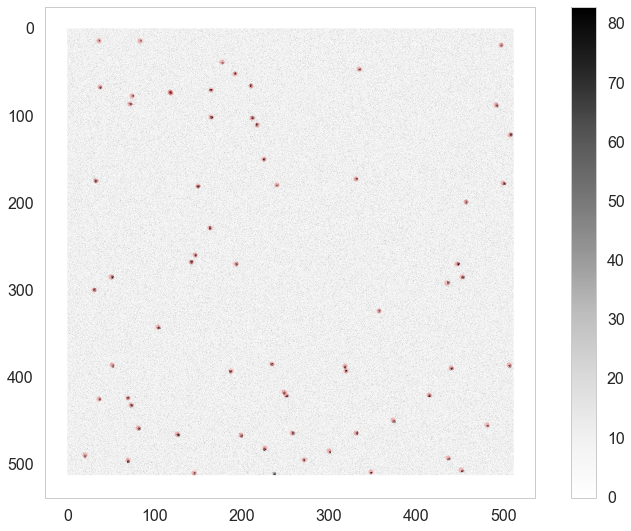

In [9]:
io.imshow(imgs[0],cmap='Greys')
plt.scatter(zero_crossing_x,zero_crossing_y,20,color='r',alpha=0.2)
plt.grid(False)

In [10]:
def SpotEnhancingFilterLocalization(imgs,c=4):
    #bottom-localization via the Spot-Enhancing Filter
    #input:
    # imgs - dictionary of fr#:img
    # c - constant that determines the threshold level
    c = 4
    ysefx = {}
    ysefy = {}

    for fr in imgs.keys():
        img = imgs[fr]
        filtered = -sp.ndimage.filters.gaussian_laplace(img,2)

        thres = (np.mean(filtered)+c)*np.std(filtered)
        thres_filtered = filtered-thres
        thres_filtered[thres_filtered<0] = 0 
        grad_filtered = np.gradient(filtered)

        zero_crossings = np.where((np.diff(np.sign(grad_filtered[0]),axis=0)<0)[:511,:511] & (np.diff(np.sign(grad_filtered[1]),axis=1)<0)[:511,:511])
        zero_crossing_x = np.array([])
        zero_crossing_y = np.array([])
        for y,x in zip(zero_crossings[0],zero_crossings[1]):
            if thres_filtered[y,x]>0:
                zero_crossing_x = np.append(zero_crossing_x,[x])
                zero_crossing_y = np.append(zero_crossing_y,[y])
        ysefx[fr] = zero_crossing_x
        ysefy[fr] = zero_crossing_y
        
    return ysefx,ysefy

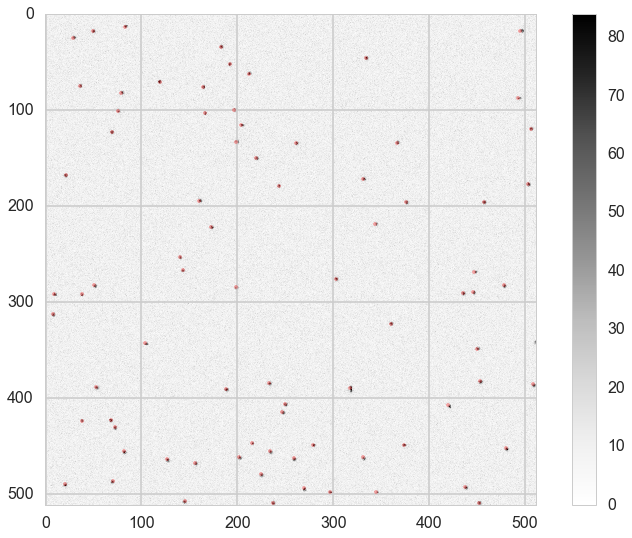

In [11]:
ysefx,ysefy = SpotEnhancingFilterLocalization(imgs)
plt.scatter(ysefx[3],ysefy[3],10,alpha=.3,color='r')
io.imshow(imgs[3],cmap='Greys')

In [12]:
ysef = {}
w = 6. #size of the window in which Imax is calculated
sigxy = 2. 

for fr in ysefx.keys():
    Imax = []
    #print 'frame=%d' %fr
    for x,y in zip(ysefx[fr],ysefy[fr]):
        minx = np.max((int(x-w/2),0))
        maxx = np.min((int(x+w/2),imgs[fr].shape[1]))
        miny = np.max((int(y-w/2),0))
        maxy = np.min((int(y+w/2),imgs[fr].shape[0]))
        Imax = Imax+ [np.max(imgs[fr][miny:maxy,minx:maxx])]
        
    Imax = np.array(Imax)
    #x,y,Imax,sigxy
    ysef[fr] = np.vstack((ysefx[fr],ysefy[fr],Imax,np.repeat(sigxy,ysefx[fr].shape[0])))

In [13]:
ysef[0]

array([[  36.,   83.,  497.,  177.,  335.,  192.,  210.,   37.,  164.,
         117.,  118.,   74.,   72.,  492.,  165.,  212.,  217.,  508.,
         225.,  331.,   32.,  500.,  240.,  149.,  457.,  163.,  146.,
         142.,  193.,  447.,   50.,  453.,  436.,   30.,  357.,  104.,
         234.,   51.,  507.,  318.,  440.,  187.,  319.,  248.,  251.,
         415.,   69.,   36.,   73.,  374.,  481.,   81.,  258.,  331.,
         126.,  199.,  226.,  300.,   20.,  437.,  271.,   69.,  452.,
         348.,  145.],
       [  13.,   13.,   18.,   38.,   46.,   51.,   65.,   66.,   70.,
          72.,   73.,   76.,   86.,   87.,  101.,  102.,  110.,  121.,
         149.,  172.,  174.,  177.,  179.,  180.,  198.,  228.,  259.,
         267.,  269.,  269.,  284.,  284.,  291.,  299.,  323.,  342.,
         384.,  386.,  386.,  387.,  389.,  392.,  392.,  417.,  420.,
         420.,  423.,  424.,  431.,  449.,  454.,  458.,  463.,  463.,
         465.,  466.,  481.,  484.,  489.,  492.,  494

In [14]:
#Motion model
F = {}
Q = {}
qx = 9.
qxdot = 5.
qy = 9.
qydot = 5.
qImax = 5.
qsigxy = 5.
F[0] = np.diag(np.ones(6,dtype=float))
Q[0] = np.diag([qx,qxdot,qy,qydot,qImax,qsigxy])

#Measurement Model
H = np.zeros((4,6))
H[0,0] = 1.
H[1,2] = 1.
H[2,4] = 1.
H[3,5] = 1.

rx = 1.
ry = 1.
rImax = 5.
rsigxy = 1.
R = np.diag([rx,ry,rImax,rsigxy])

#projection matrix
Pi = np.zeros((2,4))
Pi[0,0] = 1
Pi[1,1] = 1

#Selection Matrix
Psi = np.diag([0,0,1,1])


In [116]:
def GNN(y1,y2,L=15):
    #Global nearest neighbor
    #y1,y2: # of particles X # of features matrix
    #L: distance limit
    #return connection matrix. 
    y1 = np.array(y1)
    y2 = np.array(y2)
    inf = 1E10
    N1 = y1.shape[0]
    N2 = y2.shape[0]
    #cost matrix
    C = np.zeros((N1+1,N2+1))
    #link matrix
    G = np.zeros((N1+1,N2+1),dtype=int)
    
    #initialization
    C[0,:] = L**2
    C[:,0] = L**2
    for i,yy1 in enumerate(y1):
        pi = np.sum((y2-yy1)**2,axis=1)
        pi[pi>L**2] = inf
        candj = np.where(np.sum(G[:,1:],axis=0)==0)[0]
        #print candj
        if candj.shape[0]>0:
            j = candj[np.argmin(pi[candj])]
            G[i+1,j+1] = 1
        else:
            G[i+1,0] = 1
        C[i+1,1:] = pi
        
    for j in range(y2.shape[0]):
        if np.sum(G[:,j+1])==0:
            G[0,j+1] = 1
    
    #sanity check
    goodtogo = True
    for row in G[1:,:]:
        if np.sum(row)!=1:
            goodtogo = False
    for col in G[:,1:].T:
        if np.sum(col)!=1:
            goodtogo = False
    if (not goodtogo):
        print 'error in initialization'

    #reduced cost
    stop = False
    while (not stop):
        minzIJ = 0
        #candidates
        cand = np.where((C<inf) & (G==0))
        for I,J in zip(cand[0],cand[1]):
            if (I==0) & (J==0):
                zIJ = 0
            
            if (I==0) & (J>0):
                K = np.where(G[:,J]==1)[0][0]
                zIJ = C[0,J] - C[K,J] + C[K,0]
            elif (J==0) & (I>0):
                L = np.where(G[I,:]==1)[0][0]
                zIJ = C[I,0] - C[I,L] + C[0,L]
            elif (I>0) & (J>0):
                L = np.where(G[I,:]==1)[0][0]
                K = np.where(G[:,J]==1)[0][0]
                zIJ = C[I,J] - C[I,L] - C[K,J] + C[K,L]
            
            if zIJ < minzIJ:
                minzIJ = zIJ
                minzIJ_pair = (I,J)
        if minzIJ < 0:
            I = minzIJ_pair[0]
            J = minzIJ_pair[1]
            
            if (I>0) & (J==0):
                L = np.where(G[I,:]==1)[0][0]
                G[I,L] = 0
                G[0,L] = 1
                G[I,J] = 1
                
            if (J>0) & (I==0):
                K = np.where(G[:,J]==1)[0][0]
                G[K,J]=0
                G[K,0]=1
                G[I,J]=1
            if (I>0) & (J>0):
                L = np.where(G[I,:]==1)[0][0]
                K = np.where(G[:,J]==1)[0][0]
                G[I,L] = 0
                G[K,J] = 0
                G[K,L] = 1
                G[I,J] = 1
        else:
            stop = True
    
            
    return G
                
            
                
        
    

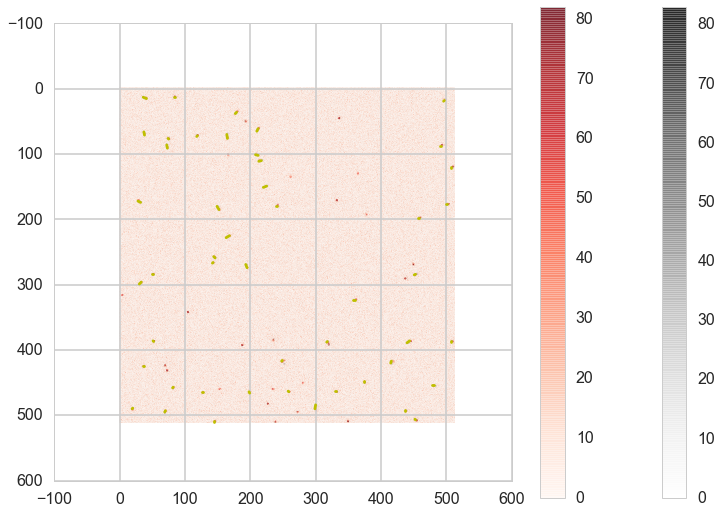

In [118]:
#GNN test
G = GNN(ysef[0][0:2,:].T,ysef[1][0:2,:].T,L=20)
io.imshow(imgs[0],cmap='Greys',alpha=0.6)
io.imshow(imgs[1],cmap='Reds',alpha=0.6)
ilist,jlist = np.where(G==1)

for i,j in zip(ilist,jlist):
    if (i==0) | (j==0):
        continue
    plt.plot([ysef[0][0,i-1],ysef[1][0,j-1]],[ysef[0][1,i-1],ysef[1][1,j-1]],'y-',alpha=1)

In [107]:
#convert trajectory dictionary to mean vector
def traj2m(traj,id_list,fr):
    id_list = np.array(id_list)
    m = np.zeros((6,id_list.shape[0]))
    for i,trajid in enumerate(id_list):
        trs = np.array(traj[trajid])
        tvec = [np.array(map(lambda x: x['t'],trs))]
        tr = trs[tvec==fr]
        m[0,i] = tr['x']
        m[1,i] = tr['xdot']
        m[2,i] = tr['y']
        m[3,i] = tr['ydot']
        m[4,i] = tr['Imax']
        m[5,i] = tr['sigxy']
    return m
    

In [108]:
def generateElliptical(Cov,gamma_p,Nc,Nj):
    #Generate Nc*Nj elliptical measurements using Cov (covariance matrix)
    Lamb,E = np.linalg.eig(Cov)

    if Lamb[0]<Lamb[1]:
        Lamb = np.roll(Lamb,1)
        E = np.roll(E,1,axis=1)

    r = np.zeros((2,2))  #semi-axes of the elliptical region
    r[:,0] = gamma_p*np.sqrt(Lamb[0])*E[:,0]
    r[:,1] = gamma_p*np.sqrt(Lamb[1])*E[:,1]
    
    p = np.zeros((2,Nc*Nj))
    ind = 0
    for c in range(1,Nc+1):
        for j in range(1,Nj+1):
            uj = [np.linalg.norm(r[:,0])*np.cos(2*math.pi*float(j)/Nj),
                  np.linalg.norm(r[:,1])*np.sin(2*math.pi*float(j)/Nj)]
            p[:,ind] = float(c)/Nc*E.dot(np.array(uj))
            ind += 1
    return p
    

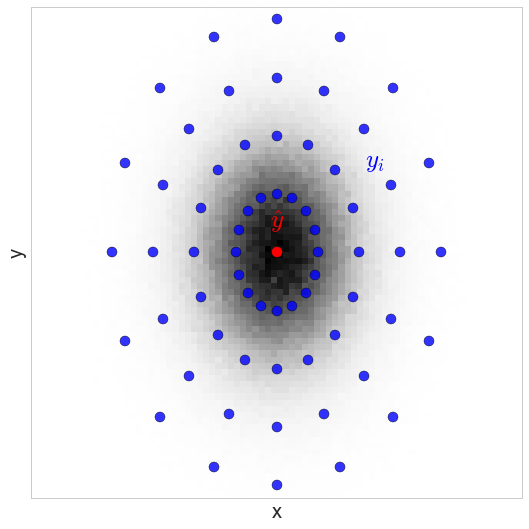

In [109]:
Cov = np.array([[20,0],[0,40]])
X = sp.random.multivariate_normal([0,0],Cov,1000000)
plt.hist2d(X[:,0],X[:,1],bins=[80,80],range=[[-20,20],[-20,20]])
p = generateElliptical(Cov,3.0,4,16)
plt.scatter(p[0,:],p[1,:],100,marker='o',alpha=0.8)
plt.scatter(0,0,100,color='r')
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.axis('image')
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)
plt.xlim([-20,20])
plt.ylim([-20,20])
plt.text(0,2,'$\hat{y}$',color='r',fontsize=25,horizontalalignment='center')
plt.text(8,7,'$y_i$',color='b',fontsize=25,horizontalalignment='center')

In [129]:
def generateBeta(y_meas,img,w=6.,Ib=10,sign=3.0):

    beta = np.zeros(y_meas.shape[1])
    
    for i,row in enumerate(y_meas.T):
        xp = row[0]
        yp = row[1]
        Imax = row[2]
        sigxy = row[3]
        
        #define roi
        xmin = int(np.min((np.max((np.round(xp-w/2),0)),img.shape[1])))
        xmax = int(np.min((np.max((np.round(xp+w/2),0)),img.shape[1])))
        ymin = int(np.min((np.max((np.round(yp-w/2),0)),img.shape[0])))
        ymax = int(np.min((np.max((np.round(yp+w/2),0)),img.shape[0])))
        
        if (xmin == xmax) | (ymin==ymax):
            beta[i]=0
        else:
            X = np.repeat(np.array([range(xmin,xmax)]),ymax-ymin,axis=0)
            Y = np.repeat(np.array([range(ymin,ymax)]).T,xmax-xmin,axis=1)

            D0 = np.linalg.norm(img[ymin:ymax,xmin:xmax]-((Imax-Ib)*np.exp(-((X-xp)**2+(Y-yp)**2)/(2*sigxy**2))+Ib))
            Db = np.linalg.norm(img[ymin:ymax,xmin:xmax]-Ib)

            beta[i] = np.exp(-(D0-Db)**2/(2*sign**2))

    beta = beta/np.sum(beta)

    
    return beta
        
        
        

In [25]:
def updateBeta(y_meas_all,beta_all,sigp=2.0,deltap=3):
    for key in y_meas_all.keys():
        y_meas = y_meas_all[key]
        beta = beta_all[key]
        for i,b in enumerate(beta):
            y = y_meas[i]
            p = Pi.dot(y)
            xp = p[0]
            yp = p[1]
            #meshgrid
            xmin = np.round(xp-deltap-1,0)
            xmax = np.round(xp+deltap+1,0)
            ymin = np.round(yp-deltap-1,0)
            ymax = np.round(yp+deltap+1,0)
            X = np.repeat(np.array([range(xmin,xmax)]),ymax-ymin+1,axis=0)
            Y = np.repeat(np.array([range(ymin,ymax)]).T,xmax-xmin+1,axis=1)
            
            
            beta[i] = beta*S
            distlist = distance.cdist([y_meas[:2,i]].T,pos_list.T,'euclidean')
            

In [125]:
%%time

gamma_p = 3
Nd_thres = 4
Nc = 4
Nj = 16
Ib = 10 #background level
L = 20


#initialize trajectory dictionary

traj = {}
Nd = {}  #no-match counter
P = {}

for i,row in enumerate(ysef[0].T):
    x = row[0]
    y = row[1]
    Imax = row[2]
    sigxy = row[3]
    traj[i] = [{'t':0,'x':x,'y':y,'Imax':Imax,'sigxy':sigxy,'xdot':0,'ydot':0}]
    Nd[i] = 0
    #store the covariance matrix P in the last step. key is the trajectory id
    P[i] = np.diag(np.repeat(10,6))
    

for fr in imgs.keys()[1:]:
    #construct mean vector using traj and Nd dictionaries
    id_list = np.array(Nd.keys())
    maxid = np.max(id_list) 
    id_list = id_list[np.array(Nd.values())<Nd_thres] #trajectories that haven't been terminated
    
    mprev = traj2m(traj,id_list,fr-1)
    
    Fnow = F[0]
    Qnow = Q[0]
    mhat = Fnow.dot(mprev)
    
    yhat = H.dot(mhat)
    
    #link yhat and ysef
    G = GNN(yhat[0:3].T,ysef[fr][0:3].T,L=L)
    
    #remake yhat and ysef to match their orders using G. Assign -1 if not linked
    Npar = np.sum(G)#Number of particles in curret frame
    unpaired_id = np.where(G[0,1:]==1)[0]   #unpaired ysef ids
    
    phat = Pi.dot(yhat)
    psef = Pi.dot(ysef[fr])
    
    y_meas_all = {}
    beta_all = {}
    #update m with Kalman gain
    for i in range(yhat.shape[1]):
        Phat = Fnow.dot(P[id_list[i]]).dot(Fnow.T)+Qnow
        S = H.dot(Phat).dot(H.T)+R
        
        # Generate elliptical measurements
        Sp = Pi.dot(S).dot(Pi.T)
        phat_meas = np.array([phat[:,i]]).T + generateElliptical(Sp,gamma_p,Nc,Nj)  #elliptical measurements list
        yhat_meas = np.linalg.pinv(Pi).dot(phat_meas)
        y_meas = yhat_meas+np.array([Psi.dot(yhat[:,i])]).T
        y_meas = np.hstack((y_meas,np.array([yhat[:,i]]).T))
        
        if G[i+1,0]==1:
            Nd[id_list[i]] += 1
        else:
            pairid = np.where(G[i+1,1:]==1)[0][0]
            Rp = Pi.dot(R).dot(Pi.T)
            psef_meas = np.array([psef[:,pairid]]).T+generateElliptical(Rp,gamma_p,Nc,Nj)
            ysef_meas = np.linalg.pinv(Pi).dot(psef_meas)
            y_meas = np.hstack((y_meas,ysef_meas+np.array([Psi.dot(ysef[fr][:,pairid])]).T))
            y_meas = np.hstack((y_meas,np.array([ysef[fr][:,pairid]]).T))
        y_meas_all[i] = y_meas
        beta_all[i] = generateBeta(y_meas,imgs[fr],Ib=Ib)
   
    for i in range(yhat.shape[1]):
        Phat = Fnow.dot(P[id_list[i]]).dot(Fnow.T)+Qnow
        S = H.dot(Phat).dot(H.T)+R
        #Kalman Filter
        K = Phat.dot(H.T).dot(np.linalg.inv(S))
        
        innov = np.sum(np.multiply(np.repeat(np.array([beta_all[i]]),4,axis=0),
                                   (y_meas_all[i]-np.array([yhat[:,i]]).T)),axis=1)
        
        m = mhat[:,i]+K.dot(innov)
        #print m
        tr = traj[id_list[i]]
        tr = tr+[{'t':fr,'x':m[0],'xdot':m[1],'y':m[2],'ydot':m[3],'Imax':m[4],'sigxy':m[5]}]
        traj[id_list[i]] = tr
        P[id_list[i]] = (np.eye(6)-K.dot(H)).dot(Phat) 
    
    for i,idx in enumerate(unpaired_id):
        row = ysef[fr][:,idx]
        x = row[0]
        y = row[1]
        Imax = row[2]
        sigxy = row[3]
        traj[maxid+1] = [{'t':fr,'x':x,'y':y,'Imax':Imax,'sigxy':sigxy,'xdot':0,'ydot':0}]
        Nd[maxid+1] = 0
        #store the covariance matrix P in the last step. key is the trajectory id
        P[maxid+1] = np.diag(np.repeat(10,6)) 
        maxid += 1
   
    print fr
    
    
    

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [120]:
from xml.dom.minidom import parseString
import datetime
nowtime = datetime.datetime.now()
xmlstr = """<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<root>
<TrackContestISBI2012 SNR="7" density="mid" generationDateTime="%s" info="tracking done by Tae Yeon Yoo" scenario="VESICLE">
""" %nowtime
strtoadd = ""
keys = traj.keys()
for key in keys:
    particle = traj[key]
    strtoadd = strtoadd + """<particle>
    """
    for pos in particle:
        strtoadd = strtoadd+"""<detection t="%d" x="%f" y="%f" z="0"/>
        """%(pos['t'],pos['x'],pos['y'])
    strtoadd = strtoadd+"""</particle>
    """
xmlstr = xmlstr+strtoadd+"""</TrackContestISBI2012>
</root>"""
doc = parseString(xmlstr)

In [121]:
with open("test.xml", "w") as f:
    f.write( doc.toxml() )